In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import holoviews as hv
import plotly.graph_objects as go
from holoviews import opts
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, recall_score, matthews_corrcoef, accuracy_score, auc, roc_curve
from sklearn.model_selection import train_test_split

In [191]:
data = pd.read_csv("../dat/dips/DIPS_Data.csv", sep = ",", low_memory = False)
data_change = pd.read_csv("../dat/dips/DIPS_Data_cleaned_change.csv", sep = ",", low_memory = False)
data_change_excl = pd.read_csv("../dat/dips/DIPS_Data_cleaned_change_excl.csv", sep = ",", low_memory = False)
with open("../dat/dips/indices_k1_not_space.txt", "r") as f:
    excl_indices = [int(line.strip()) for line in f.readlines()]

In [192]:
y_pred_GPT_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_simple_prompt.csv", sep =",")
y_pred_GPT_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_class_definitions_prompt.csv", sep =",")
y_pred_GPT_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_profiled_simple_prompt.csv", sep =",")
y_pred_GPT_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_few_shot_prompt.csv", sep =",")
y_pred_GPT_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_vignette_prompt.csv", sep =",")
y_pred_GPT_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_cot_prompt.csv", sep =",")

In [193]:
y_pred_GPT_o3_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_simple_prompt.csv", sep =",")
y_pred_GPT_o3_class_definitions_prompt = pd.read_csv(
    "02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_class_definitions_prompt.csv", sep =",")
y_pred_GPT_o3_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_profiled_simple_prompt.csv", sep =",")
y_pred_GPT_o3_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_few_shot_prompt.csv", sep =",")
y_pred_GPT_o3_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_vignette_prompt.csv", sep =",")
y_pred_GPT_o3_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_cot_prompt.csv", sep =",")

In [194]:
y_pred_Gemini_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_simple_prompt.csv", sep =",")
y_pred_Gemini_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_class_definitions_prompt.csv", sep =",")
y_pred_Gemini_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_profiled_simple_prompt.csv", sep =",")
y_pred_Gemini_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt.csv", sep =",")
y_pred_Gemini_few_shot_prompt_10 = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt_10.csv", sep =",")
y_pred_Gemini_few_shot_prompt_20 = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt_20.csv", sep =",")
y_pred_Gemini_few_shot_prompt_50 = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt_50.csv", sep =",")
y_pred_Gemini_few_shot_prompt_100 = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt_100.csv", sep =",")
y_pred_Gemini_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_vignette_prompt.csv", sep =",")
y_pred_Gemini_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_cot_prompt.csv", sep =",")

In [195]:
y_pred_Gemma_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_simple_prompt.csv", sep =",")
y_pred_Gemma_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_class_definitions_prompt.csv", sep =",")
y_pred_Gemma_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_profiled_simple_prompt.csv", sep =",")
y_pred_Gemma_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_few_shot_prompt.csv", sep =",")
y_pred_Gemma_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_vignette_prompt.csv", sep =",")
y_pred_Gemma_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_cot_prompt.csv", sep =",")

In [196]:
y_pred_Claude_4_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_simple_prompt.csv", sep =",")
y_pred_Claude_4_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_class_definitions_prompt.csv", sep =",")
y_pred_Claude_4_profiled_simple_prompt = pd.read_csv(
    "02_LLM/y_pred_LLMs/Claude/y_pred_claude_profiled_simple_prompt.csv", sep =",")
y_pred_Claude_4_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_few_shot_prompt.csv", sep =",")
y_pred_Claude_4_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_vignette_prompt.csv", sep =",")
y_pred_Claude_4_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_cot_prompt.csv", sep =",")

In [197]:
y_pred_DeepSeek_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_simple_prompt.csv", sep =",")
y_pred_DeepSeek_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_class_definitions_prompt.csv", sep =",")
y_pred_DeepSeek_profiled_simple_prompt = pd.read_csv(
    "02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_profiled_simple_prompt.csv", sep =",")
y_pred_DeepSeek_few_shot_prompt_20 = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_few_shot_prompt_20.csv", sep =",")
y_pred_DeepSeek_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_few_shot_prompt.csv", sep =",")
y_pred_DeepSeek_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_vignette_prompt.csv", sep =",")
y_pred_DeepSeek_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_cot_prompt.csv", sep =",")

In [198]:
y_pred_Grok_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_simple_prompt.csv", sep =",")
y_pred_Grok_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_class_definitions_prompt.csv", sep =",")
y_pred_Grok_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_profiled_simple_prompt.csv", sep =",")
y_pred_Grok_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_few_shot_prompt.csv", sep =",")
y_pred_Grok_few_shot_prompt_20 = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_few_shot_prompt_20.csv", sep =",")
y_pred_Grok_few_shot_prompt_100 = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_few_shot_prompt_100.csv", sep =",")
y_pred_Grok_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_vignette_prompt.csv", sep =",")
y_pred_Grok_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_cot_prompt.csv", sep =",")

In [199]:
X_train_GPT_4_simple_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_simple_prompt.csv", sep = ",")
X_train_GPT_4_class_def_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_class_definitions_prompt.csv", sep = ",")
X_train_GPT_4_profiled_simple_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_profiled_simple_prompt.csv", sep = ",")
X_train_GPT_4_few_shot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_few_shot_prompt.csv", sep = ",")
X_train_GPT_4_vignette_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_vignette_prompt.csv", sep = ",")
X_train_GPT_4_cot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_cot_prompt.csv", sep = ",")

In [200]:
X_train_GPT_o3_simple_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_simple_prompt.csv", sep = ",")
X_train_GPT_o3_class_def_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_class_definitions_prompt.csv", sep = ",")
X_train_GPT_o3_profiled_simple_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_profiled_simple_prompt.csv", sep = ",")
X_train_GPT_o3_few_shot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_few_shot_prompt.csv", sep = ",")
X_train_GPT_o3_vignette_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_vignette_prompt.csv", sep = ",")
X_train_GPT_o3_cot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_cot_prompt.csv", sep = ",")

In [201]:
X_train_Gemma_simple_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Gemma/X_train_Gemma_simple_prompt.csv", sep = ",")
X_train_Gemma_class_def_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/Gemma/X_train_Gemma_class_definitions_prompt.csv", sep = ",")
X_train_Gemma_profiled_simple_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/Gemma/X_train_Gemma_profiled_simple_prompt.csv", sep = ",")
X_train_Gemma_few_shot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Gemma/X_train_Gemma_few_shot_prompt.csv", sep = ",")
X_train_Gemma_vignette_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Gemma/X_train_Gemma_vignette_prompt.csv", sep = ",")
X_train_Gemma_cot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Gemma/X_train_Gemma_cot_prompt.csv", sep = ",")

In [202]:
X_train_Claude_simple_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Claude/X_train_Claude_simple_prompt.csv", sep = ",")
X_train_Claude_class_def_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/Claude/X_train_Claude_class_definitions_prompt.csv", sep = ",")
X_train_Claude_profiled_simple_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/Claude/X_train_Claude_profiled_simple_prompt.csv", sep = ",")
X_train_Claude_few_shot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Claude/X_train_Claude_few_shot_prompt.csv", sep = ",")
X_train_Claude_vignette_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Claude/X_train_Claude_vignette_prompt.csv", sep = ",")
X_train_Claude_cot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Claude/X_train_Claude_cot_prompt.csv", sep = ",")

In [203]:
X_train_DeepSeek_simple_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/DeepSeek/X_train_deeps_simple_prompt.csv", sep = ",")
X_train_DeepSeek_class_def_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/DeepSeek/X_train_deeps_class_definitions_prompt.csv", sep = ",")
X_train_DeepSeek_profiled_simple_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/DeepSeek/X_train_deeps_profiled_simple_prompt.csv", sep = ",")
X_train_DeepSeek_few_shot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/DeepSeek/X_train_deeps_few_shot_prompt.csv", sep = ",")
X_train_DeepSeek_vignette_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/DeepSeek/X_train_deeps_vignette_prompt.csv", sep = ",")
X_train_DeepSeek_cot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/DeepSeek/X_train_deeps_cot_prompt.csv", sep = ",")

In [204]:
X_train_Grok_simple_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Grok/X_train_grok_simple_prompt.csv", sep = ",")
X_train_Grok_class_def_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/Grok/X_train_grok_class_definitions_prompt.csv", sep = ",")
X_train_Grok_profiled_simple_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/Grok/X_train_grok_profiled_simple_prompt.csv", sep = ",")
X_train_Grok_few_shot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Grok/X_train_grok_few_shot_prompt.csv", sep = ",")
X_train_Grok_vignette_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Grok/X_train_grok_vignette_prompt.csv", sep = ",")
X_train_Grok_cot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Grok/X_train_grok_cot_prompt.csv", sep = ",")

In [205]:
# Predictors
X = data_change
X = X.drop(["hpi"], axis = 1)

# Target
y = data_change["hpi"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train shape: ", X_train.shape, round(X_train.shape[0]/len(X), 2), "\n",
      "X_test shape: ", X_test.shape, round(X_test.shape[0]/len(X), 2),  "\n",
      "y_train shape: ", y_train.shape, round(y_train.shape[0]/len(y), 2), "\n",
      "y_test shape: ", y_test.shape, round(y_test.shape[0]/len(y), 2), "\n")

X_train shape:  (983, 22) 0.8 
 X_test shape:  (246, 22) 0.2 
 y_train shape:  (983,) 0.8 
 y_test shape:  (246,) 0.2 



In [206]:
y_test

548     0.0
1125    0.0
244     0.0
552     0.0
1163    0.0
       ... 
807     0.0
88      1.0
1085    0.0
298     0.0
376     1.0
Name: hpi, Length: 246, dtype: float64

In [207]:
test_indices = y_test.index.tolist()
train_indices = y_train.index.tolist()

In [280]:
def concat_with_idx(y_pred_df, X_train_df):
    """
    Concatenate two DataFrames and add an index column.
    """
    y_pred_df_idx = pd.DataFrame({
        "y_pred": y_pred_df["y_pred"],
        "original_index": test_indices
    })

    X_train_df_idx = pd.DataFrame({
        "y_pred": X_train_df["y_pred"],
        "original_index": train_indices
    })

    df = pd.concat([y_pred_df_idx, X_train_df_idx])

    # sort by the original index
    df = df.sort_values(by = "original_index").reset_index(drop=True)

    # only keep row indices that are not in the excluded indices
    # df = df[~df["original_index"].isin(excl_indices)]

    return df


In [281]:
len(excl_indices)

322

In [282]:
y_pred_GPT_simple_prompt_idx = pd.DataFrame({
    "y_pred": y_pred_GPT_simple_prompt["y_pred"],
    # "old_index": range(len(y_test)),
    "original_index": test_indices
})
X_train_GPT_4_simple_prompt_idx = pd.DataFrame({
    "y_pred": X_train_GPT_4_simple_prompt["y_pred"],
    # "old_index": range(len(X_train)),
    "original_index": train_indices
})

In [283]:
y_pred_GPT_simple_prompt_idx

,y_pred,original_index
0,0,548
1,0,1125
2,0,244
3,0,552
4,0,1163
...,...,...
241,1,807
242,0,88
243,0,1085
244,0,298


In [284]:
X_train_GPT_4_simple_prompt_idx

,y_pred,original_index
0,0,752
1,0,1067
2,0,986
3,0,425
4,0,644
...,...,...
978,1,1044
979,0,1095
980,0,1130
981,0,860


In [285]:
data_GPT_4_simple_prompt = concat_with_idx(y_pred_GPT_simple_prompt_idx, X_train_GPT_4_simple_prompt_idx)
data_GPT_4_simple_prompt

,y_pred,original_index
0,1,0
1,0,1
2,1,2
3,0,3
4,0,4
...,...,...
1224,0,1224
1225,0,1225
1226,0,1226
1227,0,1227


In [286]:
print(len(data_change))

1229


In [287]:
# Predictors
X = data_GPT_4_simple_prompt
X = X.drop(["y_pred"], axis=1)

# Target
y = data_GPT_4_simple_prompt["y_pred"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape: ", X_train.shape, round(X_train.shape[0] / len(X), 2), "\n",
      "X_test shape: ", X_test.shape, round(X_test.shape[0] / len(X), 2), "\n",
      "y_train shape: ", y_train.shape, round(y_train.shape[0] / len(y), 2), "\n",
      "y_test shape: ", y_test.shape, round(y_test.shape[0] / len(y), 2), "\n")


X_train shape:  (983, 1) 0.8 
 X_test shape:  (246, 1) 0.2 
 y_train shape:  (983,) 0.8 
 y_test shape:  (246,) 0.2 



In [288]:
y_test

548     0
1125    0
244     0
552     0
1163    0
       ..
807     1
88      0
1085    0
298     0
376     1
Name: y_pred, Length: 246, dtype: int64

In [289]:
y_test.value_counts(normalize=True)

y_pred
0    0.788618
1    0.211382
Name: proportion, dtype: float64

In [290]:
# do the same for all other models
data_GPT_4_simple_prompt = concat_with_idx(y_pred_GPT_simple_prompt_idx, X_train_GPT_4_simple_prompt_idx)
data_GPT_4_class_def_prompt = concat_with_idx(y_pred_GPT_class_def_prompt, X_train_GPT_4_class_def_prompt)
data_GPT_4_profiled_simple_prompt = concat_with_idx(y_pred_GPT_profiled_simple_prompt, X_train_GPT_4_profiled_simple_prompt)
data_GPT_4_few_shot_prompt = concat_with_idx(y_pred_GPT_few_shot_prompt, X_train_GPT_4_few_shot_prompt)
data_GPT_4_vignette_prompt = concat_with_idx(y_pred_GPT_vignette_prompt, X_train_GPT_4_vignette_prompt)
data_GPT_4_cot_prompt = concat_with_idx(y_pred_GPT_cot_prompt, X_train_GPT_4_cot_prompt)

In [291]:
data_GPT_o3_simple_prompt = concat_with_idx(y_pred_GPT_o3_simple_prompt, X_train_GPT_o3_simple_prompt)
data_GPT_o3_class_def_prompt = concat_with_idx(y_pred_GPT_o3_class_definitions_prompt, X_train_GPT_o3_class_def_prompt)
data_GPT_o3_profiled_simple_prompt = concat_with_idx(y_pred_GPT_o3_profiled_simple_prompt, X_train_GPT_o3_profiled_simple_prompt)
data_GPT_o3_few_shot_prompt = concat_with_idx(y_pred_GPT_o3_few_shot_prompt, X_train_GPT_o3_few_shot_prompt)
data_GPT_o3_vignette_prompt = concat_with_idx(y_pred_GPT_o3_vignette_prompt, X_train_GPT_o3_vignette_prompt)
data_GPT_o3_cot_prompt = concat_with_idx(y_pred_GPT_o3_cot_prompt, X_train_GPT_o3_cot_prompt)

In [292]:
data_Gemini_simple_prompt = concat_with_idx(y_pred_Gemini_simple_prompt, X_train_Gemma_simple_prompt)
data_Gemini_class_def_prompt = concat_with_idx(y_pred_Gemini_class_def_prompt, X_train_Gemma_class_def_prompt)
data_Gemini_profiled_simple_prompt = concat_with_idx(y_pred_Gemini_profiled_simple_prompt, X_train_Gemma_profiled_simple_prompt)
data_Gemini_few_shot_prompt = concat_with_idx(y_pred_Gemini_few_shot_prompt, X_train_Gemma_few_shot_prompt)
data_Gemini_few_shot_prompt_10 = concat_with_idx(y_pred_Gemini_few_shot_prompt_10, X_train_Gemma_few_shot_prompt)
data_Gemini_few_shot_prompt_20 = concat_with_idx(y_pred_Gemini_few_shot_prompt_20, X_train_Gemma_few_shot_prompt)
data_Gemini_few_shot_prompt_50 = concat_with_idx(y_pred_Gemini_few_shot_prompt_50, X_train_Gemma_few_shot_prompt)
data_Gemini_few_shot_prompt_100 = concat_with_idx(y_pred_Gemini_few_shot_prompt_100, X_train_Gemma_few_shot_prompt)
data_Gemini_vignette_prompt = concat_with_idx(y_pred_Gemini_vignette_prompt, X_train_Gemma_vignette_prompt)
data_Gemini_cot_prompt = concat_with_idx(y_pred_Gemini_cot_prompt, X_train_Gemma_cot_prompt)

In [293]:
data_Gemma_simple_prompt = concat_with_idx(y_pred_Gemma_simple_prompt, X_train_Gemma_simple_prompt)
data_Gemma_class_def_prompt = concat_with_idx(y_pred_Gemma_class_def_prompt, X_train_Gemma_class_def_prompt)
data_Gemma_profiled_simple_prompt = concat_with_idx(y_pred_Gemma_profiled_simple_prompt, X_train_Gemma_profiled_simple_prompt)
data_Gemma_few_shot_prompt = concat_with_idx(y_pred_Gemma_few_shot_prompt, X_train_Gemma_few_shot_prompt)
data_Gemma_vignette_prompt = concat_with_idx(y_pred_Gemma_vignette_prompt, X_train_Gemma_vignette_prompt)
data_Gemma_cot_prompt = concat_with_idx(y_pred_Gemma_cot_prompt, X_train_Gemma_cot_prompt)

In [294]:
data_Claude_4_simple_prompt = concat_with_idx(y_pred_Claude_4_simple_prompt, X_train_Claude_simple_prompt)
data_Claude_4_class_def_prompt = concat_with_idx(y_pred_Claude_4_class_def_prompt, X_train_Claude_class_def_prompt)
data_Claude_4_profiled_simple_prompt = concat_with_idx(y_pred_Claude_4_profiled_simple_prompt, X_train_Claude_profiled_simple_prompt)
data_Claude_4_few_shot_prompt = concat_with_idx(y_pred_Claude_4_few_shot_prompt, X_train_Claude_few_shot_prompt)
data_Claude_4_vignette_prompt = concat_with_idx(y_pred_Claude_4_vignette_prompt, X_train_Claude_vignette_prompt)
data_Claude_4_cot_prompt = concat_with_idx(y_pred_Claude_4_cot_prompt, X_train_Claude_cot_prompt)

In [295]:
data_DeepSeek_simple_prompt = concat_with_idx(y_pred_DeepSeek_simple_prompt, X_train_DeepSeek_simple_prompt)
data_DeepSeek_class_def_prompt = concat_with_idx(y_pred_DeepSeek_class_def_prompt, X_train_DeepSeek_class_def_prompt)
data_DeepSeek_profiled_simple_prompt = concat_with_idx(y_pred_DeepSeek_profiled_simple_prompt, X_train_DeepSeek_profiled_simple_prompt)
data_DeepSeek_few_shot_prompt = concat_with_idx(y_pred_DeepSeek_few_shot_prompt, X_train_DeepSeek_few_shot_prompt)
data_DeepSeek_few_shot_prompt_20 = concat_with_idx(y_pred_DeepSeek_few_shot_prompt_20, X_train_DeepSeek_few_shot_prompt)
data_DeepSeek_vignette_prompt = concat_with_idx(y_pred_DeepSeek_vignette_prompt, X_train_DeepSeek_vignette_prompt)
data_DeepSeek_cot_prompt = concat_with_idx(y_pred_DeepSeek_cot_prompt, X_train_DeepSeek_cot_prompt)

In [296]:
data_Grok_simple_prompt = concat_with_idx(y_pred_Grok_simple_prompt, X_train_Grok_simple_prompt)
data_Grok_class_def_prompt = concat_with_idx(y_pred_Grok_class_def_prompt, X_train_Grok_class_def_prompt)
data_Grok_profiled_simple_prompt = concat_with_idx(y_pred_Grok_profiled_simple_prompt, X_train_Grok_profiled_simple_prompt)
data_Grok_few_shot_prompt = concat_with_idx(y_pred_Grok_few_shot_prompt, X_train_Grok_few_shot_prompt)
data_Grok_few_shot_prompt_20 = concat_with_idx(y_pred_Grok_few_shot_prompt_20, X_train_Grok_few_shot_prompt)
data_Grok_few_shot_prompt_100 = concat_with_idx(y_pred_Grok_few_shot_prompt_100, X_train_Grok_few_shot_prompt)
data_Grok_vignette_prompt = concat_with_idx(y_pred_Grok_vignette_prompt, X_train_Grok_vignette_prompt)
data_Grok_cot_prompt = concat_with_idx(y_pred_Grok_cot_prompt, X_train_Grok_cot_prompt)

In [297]:
data_true_excl = data_change[~data_change.index.isin(excl_indices)]

In [242]:
data_true_excl

,whi_ges,soz_ges,gke_ges,lzh_ges,ile,woc_gesp,woc_gese,asi_ges,bsq_ges,das_ges,...,ses_kom,whi_change,soz_change,gke_change,lzh_change,asi_change,bsq_change,das_change,scl_change,hpi
0,1.905045,-1.858903,-0.994979,-1.928212,2.441714,0.062486,-0.359417,1.612646,0.764021,0.566822,...,0,-2.301869,2.753129,2.029671,1.900449,-2.518013,-1.431081,-2.600931,-2.639135,0.0
1,0.455324,-0.434443,-0.088340,0.660932,0.041981,0.413949,-1.169769,0.423639,-0.382329,0.941935,...,1,-0.752017,0.204409,0.647389,-0.211204,-0.585676,-0.262880,0.105940,-0.073737,0.0
2,3.838008,-0.701529,-0.315000,-1.280926,0.041981,-0.113246,1.261288,0.291528,-0.286800,0.441785,...,0,-0.752017,0.315223,0.094477,0.316709,1.070613,-0.262880,-0.164747,1.783966,0.0
3,-0.511158,0.990016,0.138320,0.175467,-0.957908,-1.079771,-0.521487,-0.369032,0.477433,0.024994,...,1,-0.235399,-0.017219,0.647389,0.492680,-0.723700,-1.041680,-0.489571,0.147418,0.0
6,-0.511158,-0.078328,-0.088340,0.984575,-0.157997,-0.904039,-0.440452,1.084199,1.623784,-0.391797,...,0,0.281218,-0.128033,-1.011349,-1.970916,1.208637,0.710621,1.459376,-0.294892,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,-0.511158,0.277787,-1.221639,-0.148176,-1.157886,-1.343368,-0.359417,0.555751,-0.018124,0.275069,...,0,0.281218,-0.460475,0.370933,0.844622,-0.723700,0.826225,-1.355770,0.893382,0.0
1225,-0.511158,-0.790558,-0.541660,0.822753,-0.757930,-0.376844,-0.278381,1.084199,0.477433,1.066972,...,0,0.281218,0.758478,-1.011349,-1.794945,0.242469,-0.068179,-1.518183,-0.692971,0.0
1226,-0.511158,-0.523472,-0.315000,0.013646,0.241958,0.238217,0.288865,-1.293815,-1.242092,-0.308439,...,0,0.281218,-0.349661,0.370933,1.372536,1.346661,0.710621,-0.814396,0.191649,0.0
1227,-0.027917,-1.680845,0.364979,-0.471819,0.241958,-0.376844,0.369900,0.159416,0.286375,0.691860,...,0,-0.752017,-0.128033,-0.734893,0.492680,-0.171604,-0.262880,-0.110610,-1.975670,0.0


In [235]:
data_Grok_simple_prompt

,y_pred,original_index
0,1,0
1,1,1
2,1,2
3,1,3
6,1,6
...,...,...
1224,1,1224
1225,1,1225
1226,1,1226
1227,1,1227


In [247]:
X = data_Grok_simple_prompt
X = X.drop(["y_pred"], axis = 1)

# Target
y = data_Grok_simple_prompt["y_pred"]

# Train-test split
_, _, y_pred_train, y_pred_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print("y_pred_train shape: ", y_pred_train.shape, round(y_pred_train.shape[0]/len(y), 2), "\n",
      "y_pred_test shape: ", y_pred_test.shape, round(y_pred_test.shape[0]/len(y), 2), "\n")

y_pred_train shape:  (786,) 0.8 
 y_pred_test shape:  (197,) 0.2 



In [249]:
X = data_true_excl
X = X.drop(["hpi"], axis = 1)

# Target
y = data_true_excl["hpi"]

# Train-test split
_, _, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print("y_train shape: ", y_train.shape, round(y_train.shape[0]/len(y), 2), "\n",
      "y_test shape: ", y_test.shape, round(y_test.shape[0]/len(y), 2), "\n")

y_train shape:  (786,) 0.8 
 y_test shape:  (197,) 0.2 



In [252]:
# calculate metrics for all models
def calculate_metrics(y_test, whole_data_df):

    X = whole_data_df
    X = X.drop(["y_pred"], axis = 1)

    # Target
    y = whole_data_df["y_pred"]

    # Train-test split
    _, _, y_pred_train, y_pred_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)


    accuracy = accuracy_score(y_test, y_pred_test)
    macro_f1 = recall_score(y_test, y_pred_test, average = "macro")
    micro_f1 = recall_score(y_test, y_pred_test, average = "micro")
    mcc = matthews_corrcoef(y_test, y_pred_test)

    cm = confusion_matrix(y_test, y_pred_test)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test, pos_label = 1)
    roc_auc = auc(fpr, tpr)

    # dictionary with all metrics
    metrics = {
        "accuracy": accuracy,
        "macro_f1": macro_f1,
        "micro_f1": micro_f1,
        "mcc": mcc,
        "precision": precision,
        "recall": recall,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "roc_auc": roc_auc
    }

    return metrics

## Metrics

In [266]:
metrics_GPT_4_simple_prompt = calculate_metrics(y_test, data_GPT_4_simple_prompt)
metrics_GPT_4_class_def_prompt = calculate_metrics(y_test, data_GPT_4_class_def_prompt)
metrics_GPT_4_profiled_simple_prompt = calculate_metrics(y_test, data_GPT_4_profiled_simple_prompt)
metrics_GPT_4_few_shot_prompt = calculate_metrics(y_test, data_GPT_4_few_shot_prompt)
metrics_GPT_4_vignette_prompt = calculate_metrics(y_test, data_GPT_4_vignette_prompt)
metrics_GPT_4_cot_prompt = calculate_metrics(y_test, data_GPT_4_cot_prompt)

In [267]:
metrics_GPT_o3_simple_prompt = calculate_metrics(y_test, data_GPT_o3_simple_prompt)
metrics_GPT_o3_class_def_prompt = calculate_metrics(y_test, data_GPT_o3_class_def_prompt)
metrics_GPT_o3_profiled_simple_prompt = calculate_metrics(y_test, data_GPT_o3_profiled_simple_prompt)
metrics_GPT_o3_few_shot_prompt = calculate_metrics(y_test, data_GPT_o3_few_shot_prompt)
metrics_GPT_o3_vignette_prompt = calculate_metrics(y_test, data_GPT_o3_vignette_prompt)
metrics_GPT_o3_cot_prompt = calculate_metrics(y_test, data_GPT_o3_cot_prompt)

In [268]:
metrics_Gemini_simple_prompt = calculate_metrics(y_test, data_Gemini_simple_prompt)
metrics_Gemini_class_def_prompt = calculate_metrics(y_test, data_Gemini_class_def_prompt)
metrics_Gemini_profiled_simple_prompt = calculate_metrics(y_test, data_Gemini_profiled_simple_prompt)
metrics_Gemini_few_shot_prompt = calculate_metrics(y_test, data_Gemini_few_shot_prompt)
metrics_Gemini_few_shot_prompt_10 = calculate_metrics(y_test, data_Gemini_few_shot_prompt_10)
metrics_Gemini_few_shot_prompt_20 = calculate_metrics(y_test, data_Gemini_few_shot_prompt_20)
metrics_Gemini_few_shot_prompt_50 = calculate_metrics(y_test, data_Gemini_few_shot_prompt_50)
metrics_Gemini_few_shot_prompt_100 = calculate_metrics(y_test, data_Gemini_few_shot_prompt_100)
metrics_Gemini_vignette_prompt = calculate_metrics(y_test, data_Gemini_vignette_prompt)
metrics_Gemini_cot_prompt = calculate_metrics(y_test, data_Gemini_cot_prompt)

In [269]:
metrics_Gemma_simple_prompt = calculate_metrics(y_test, data_Gemma_simple_prompt)
metrics_Gemma_class_def_prompt = calculate_metrics(y_test, data_Gemma_class_def_prompt)
metrics_Gemma_profiled_simple_prompt = calculate_metrics(y_test, data_Gemma_profiled_simple_prompt)
metrics_Gemma_few_shot_prompt = calculate_metrics(y_test, data_Gemma_few_shot_prompt)
metrics_Gemma_vignette_prompt = calculate_metrics(y_test, data_Gemma_vignette_prompt)
metrics_Gemma_cot_prompt = calculate_metrics(y_test, data_Gemma_cot_prompt)

In [270]:
metrics_Claude_4_simple_prompt = calculate_metrics(y_test, data_Claude_4_simple_prompt)
metrics_Claude_4_class_def_prompt = calculate_metrics(y_test, data_Claude_4_class_def_prompt)
metrics_Claude_4_profiled_simple_prompt = calculate_metrics(y_test, data_Claude_4_profiled_simple_prompt)
metrics_Claude_4_few_shot_prompt = calculate_metrics(y_test, data_Claude_4_few_shot_prompt)
metrics_Claude_4_vignette_prompt = calculate_metrics(y_test, data_Claude_4_vignette_prompt)
metrics_Claude_4_cot_prompt = calculate_metrics(y_test, data_Claude_4_cot_prompt)

In [271]:
metrics_DeepSeek_simple_prompt = calculate_metrics(y_test, data_DeepSeek_simple_prompt)
metrics_DeepSeek_class_def_prompt = calculate_metrics(y_test, data_DeepSeek_class_def_prompt)
metrics_DeepSeek_profiled_simple_prompt = calculate_metrics(y_test, data_DeepSeek_profiled_simple_prompt)
metrics_DeepSeek_few_shot_prompt = calculate_metrics(y_test, data_DeepSeek_few_shot_prompt)
metrics_DeepSeek_few_shot_prompt_20 = calculate_metrics(y_test, data_DeepSeek_few_shot_prompt_20)
metrics_DeepSeek_vignette_prompt = calculate_metrics(y_test, data_DeepSeek_vignette_prompt)
metrics_DeepSeek_cot_prompt = calculate_metrics(y_test, data_DeepSeek_cot_prompt)

In [272]:
metrics_Grok_simple_prompt = calculate_metrics(y_test, data_Grok_simple_prompt)
metrics_Grok_class_def_prompt = calculate_metrics(y_test, data_Grok_class_def_prompt)
metrics_Grok_profiled_simple_prompt = calculate_metrics(y_test, data_Grok_profiled_simple_prompt)
metrics_Grok_few_shot_prompt = calculate_metrics(y_test, data_Grok_few_shot_prompt)
metrics_Grok_few_shot_prompt_20 = calculate_metrics(y_test, data_Grok_few_shot_prompt_20)
metrics_Grok_few_shot_prompt_100 = calculate_metrics(y_test, data_Grok_few_shot_prompt_100)
metrics_Grok_vignette_prompt = calculate_metrics(y_test, data_Grok_vignette_prompt)
metrics_Grok_cot_prompt = calculate_metrics(y_test, data_Grok_cot_prompt)

## Visualizations

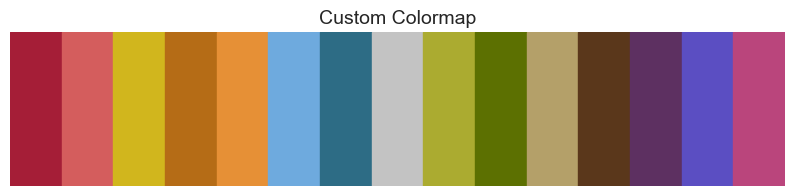

In [273]:
# define colors for the models

# base colors of QDS
base_colors = {
    "red": (165/255, 30/255, 55/255),
    "gray": (195/255, 195/255, 195/255),
    "lightgray": (203/255, 203/255, 203/255),
    "gold": (180/255, 160/255, 105/255),
}

hex_colors = [
    "#A51E37", "#D45D5D", "#D1B61D", "#B56C16", "#E69036",
    "#6EAADE", "#2D6C85", "#C3C3C3", "#ABAB30", "#5C7001",
    "#B4A069", "#5A371B", "#5D3061", "#5B4EC2", "#BA457C"
]

# Create a ListedColormap
custom_cmap = ListedColormap(hex_colors, name = "custom15")


# Visualize the colors
fig, ax = plt.subplots(figsize=(10, 2))
for i, color in enumerate(hex_colors):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
ax.set_xlim(0, len(hex_colors))
ax.set_ylim(0, 1)
ax.axis("off")
plt.title("Custom Colormap", fontsize=14)
plt.show()

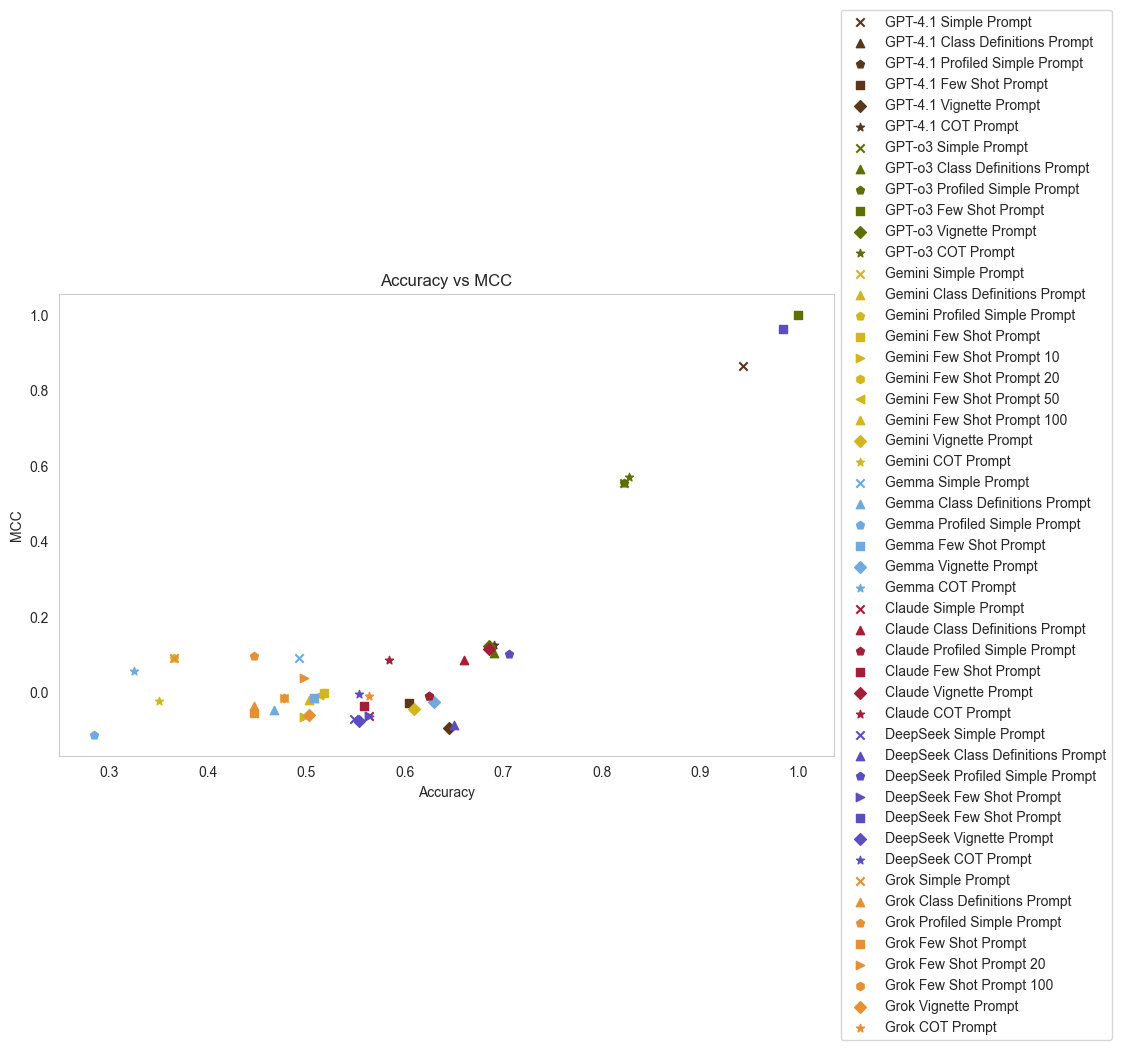

In [277]:
# plot all simple prompts for LLMs: MCC vs Accuracy
plt.figure(figsize = (10, 6))

plt.scatter(metrics_GPT_4_simple_prompt["accuracy"], metrics_GPT_4_simple_prompt["mcc"], label = "GPT-4.1 Simple Prompt", color = hex_colors[11], marker = "x")
plt.scatter(metrics_GPT_4_class_def_prompt["accuracy"], metrics_GPT_4_class_def_prompt["mcc"], label = "GPT-4.1 Class Definitions Prompt", color = hex_colors[11], marker = "^")
plt.scatter(metrics_GPT_4_profiled_simple_prompt["accuracy"], metrics_GPT_4_profiled_simple_prompt["mcc"], label = "GPT-4.1 Profiled Simple Prompt", color = hex_colors[11], marker = "p")
plt.scatter(metrics_GPT_4_few_shot_prompt["accuracy"], metrics_GPT_4_few_shot_prompt["mcc"], label = "GPT-4.1 Few Shot Prompt", color = hex_colors[11], marker = "s")
plt.scatter(metrics_GPT_4_vignette_prompt["accuracy"], metrics_GPT_4_vignette_prompt["mcc"], label = "GPT-4.1 Vignette Prompt", color = hex_colors[11], marker = "D")
plt.scatter(metrics_GPT_4_cot_prompt["accuracy"], metrics_GPT_4_cot_prompt["mcc"], label = "GPT-4.1 COT Prompt", color = hex_colors[11], marker = "*")

plt.scatter(metrics_GPT_o3_simple_prompt["accuracy"], metrics_GPT_o3_simple_prompt["mcc"], label = "GPT-o3 Simple Prompt", color = hex_colors[9], marker = "x")
plt.scatter(metrics_GPT_o3_class_def_prompt["accuracy"], metrics_GPT_o3_class_def_prompt["mcc"], label = "GPT-o3 Class Definitions Prompt", color = hex_colors[9], marker = "^")
plt.scatter(metrics_GPT_o3_profiled_simple_prompt["accuracy"], metrics_GPT_o3_profiled_simple_prompt["mcc"], label = "GPT-o3 Profiled Simple Prompt", color = hex_colors[9], marker = "p")
plt.scatter(metrics_GPT_o3_few_shot_prompt["accuracy"], metrics_GPT_o3_few_shot_prompt["mcc"], label = "GPT-o3 Few Shot Prompt", color = hex_colors[9], marker = "s")
plt.scatter(metrics_GPT_o3_vignette_prompt["accuracy"], metrics_GPT_o3_vignette_prompt["mcc"], label = "GPT-o3 Vignette Prompt", color = hex_colors[9], marker = "D")
plt.scatter(metrics_GPT_o3_cot_prompt["accuracy"], metrics_GPT_o3_cot_prompt["mcc"], label = "GPT-o3 COT Prompt", color = hex_colors[9], marker = "*")

plt.scatter(metrics_Gemini_simple_prompt["accuracy"], metrics_Gemini_simple_prompt["mcc"], label = "Gemini Simple Prompt", color = hex_colors[2], marker = "x")
plt.scatter(metrics_Gemini_class_def_prompt["accuracy"], metrics_Gemini_class_def_prompt["mcc"], label = "Gemini Class Definitions Prompt", color = hex_colors[2], marker = "^")
plt.scatter(metrics_Gemini_profiled_simple_prompt["accuracy"], metrics_Gemini_profiled_simple_prompt["mcc"], label = "Gemini Profiled Simple Prompt", color = hex_colors[2], marker = "p")
plt.scatter(metrics_Gemini_few_shot_prompt["accuracy"], metrics_Gemini_few_shot_prompt["mcc"], label = "Gemini Few Shot Prompt", color = hex_colors[2], marker = "s")
plt.scatter(metrics_Gemini_few_shot_prompt_10["accuracy"], metrics_Gemini_few_shot_prompt_10["mcc"], label = "Gemini Few Shot Prompt 10", color = hex_colors[2], marker = ">")
plt.scatter(metrics_Gemini_few_shot_prompt_20["accuracy"], metrics_Gemini_few_shot_prompt_20["mcc"], label = "Gemini Few Shot Prompt 20", color = hex_colors[2], marker = "h")
plt.scatter(metrics_Gemini_few_shot_prompt_50["accuracy"], metrics_Gemini_few_shot_prompt_50["mcc"], label = "Gemini Few Shot Prompt 50", color = hex_colors[2], marker = "<")
plt.scatter(metrics_Gemini_few_shot_prompt_100["accuracy"], metrics_Gemini_few_shot_prompt_100["mcc"], label = "Gemini Few Shot Prompt 100", color = hex_colors[2], marker = "^")
plt.scatter(metrics_Gemini_vignette_prompt["accuracy"], metrics_Gemini_vignette_prompt["mcc"], label = "Gemini Vignette Prompt", color = hex_colors[2], marker = "D")
plt.scatter(metrics_Gemini_cot_prompt["accuracy"], metrics_Gemini_cot_prompt["mcc"], label = "Gemini COT Prompt", color = hex_colors[2], marker = "*")

plt.scatter(metrics_Gemma_simple_prompt["accuracy"], metrics_Gemma_simple_prompt["mcc"], label = "Gemma Simple Prompt", color = hex_colors[5], marker = "x")
plt.scatter(metrics_Gemma_class_def_prompt["accuracy"], metrics_Gemma_class_def_prompt["mcc"], label = "Gemma Class Definitions Prompt", color = hex_colors[5], marker = "^")
plt.scatter(metrics_Gemma_profiled_simple_prompt["accuracy"], metrics_Gemma_profiled_simple_prompt["mcc"], label = "Gemma Profiled Simple Prompt", color = hex_colors[5], marker = "p")
plt.scatter(metrics_Gemma_few_shot_prompt["accuracy"], metrics_Gemma_few_shot_prompt["mcc"], label = "Gemma Few Shot Prompt", color = hex_colors[5], marker = "s")
plt.scatter(metrics_Gemma_vignette_prompt["accuracy"], metrics_Gemma_vignette_prompt["mcc"], label = "Gemma Vignette Prompt", color = hex_colors[5], marker = "D")
plt.scatter(metrics_Gemma_cot_prompt["accuracy"], metrics_Gemma_cot_prompt["mcc"], label = "Gemma COT Prompt", color = hex_colors[5], marker = "*")

plt.scatter(metrics_Claude_4_simple_prompt["accuracy"], metrics_Claude_4_simple_prompt["mcc"], label = "Claude Simple Prompt", color = hex_colors[0], marker = "x")
plt.scatter(metrics_Claude_4_class_def_prompt["accuracy"], metrics_Claude_4_class_def_prompt["mcc"], label = "Claude Class Definitions Prompt", color = hex_colors[0], marker = "^")
plt.scatter(metrics_Claude_4_profiled_simple_prompt["accuracy"], metrics_Claude_4_profiled_simple_prompt["mcc"], label = "Claude Profiled Simple Prompt", color = hex_colors[0], marker = "p")
plt.scatter(metrics_Claude_4_few_shot_prompt["accuracy"], metrics_Claude_4_few_shot_prompt["mcc"], label = "Claude Few Shot Prompt", color = hex_colors[0], marker = "s")
plt.scatter(metrics_Claude_4_vignette_prompt["accuracy"], metrics_Claude_4_vignette_prompt["mcc"], label = "Claude Vignette Prompt", color = hex_colors[0], marker = "D")
plt.scatter(metrics_Claude_4_cot_prompt["accuracy"], metrics_Claude_4_cot_prompt["mcc"], label = "Claude COT Prompt", color = hex_colors[0], marker = "*")

plt.scatter(metrics_DeepSeek_simple_prompt["accuracy"], metrics_DeepSeek_simple_prompt["mcc"], label = "DeepSeek Simple Prompt", color = hex_colors[13], marker = "x")
plt.scatter(metrics_DeepSeek_class_def_prompt["accuracy"], metrics_DeepSeek_class_def_prompt["mcc"], label = "DeepSeek Class Definitions Prompt", color = hex_colors[13], marker = "^")
plt.scatter(metrics_DeepSeek_profiled_simple_prompt["accuracy"], metrics_DeepSeek_profiled_simple_prompt["mcc"], label = "DeepSeek Profiled Simple Prompt", color = hex_colors[13], marker = "p")
plt.scatter(metrics_DeepSeek_few_shot_prompt_20["accuracy"], metrics_DeepSeek_few_shot_prompt_20["mcc"], label = "DeepSeek Few Shot Prompt", color = hex_colors[13], marker = ">")
plt.scatter(metrics_DeepSeek_few_shot_prompt["accuracy"], metrics_DeepSeek_few_shot_prompt["mcc"], label = "DeepSeek Few Shot Prompt", color = hex_colors[13], marker = "s")
plt.scatter(metrics_DeepSeek_vignette_prompt["accuracy"], metrics_DeepSeek_vignette_prompt["mcc"], label = "DeepSeek Vignette Prompt", color = hex_colors[13], marker = "D")
plt.scatter(metrics_DeepSeek_cot_prompt["accuracy"], metrics_DeepSeek_cot_prompt["mcc"], label = "DeepSeek COT Prompt", color = hex_colors[13], marker = "*")

plt.scatter(metrics_Grok_simple_prompt["accuracy"], metrics_Grok_simple_prompt["mcc"], label = "Grok Simple Prompt", color = hex_colors[4], marker = "x")
plt.scatter(metrics_Grok_class_def_prompt["accuracy"], metrics_Grok_class_def_prompt["mcc"], label = "Grok Class Definitions Prompt", color = hex_colors[4], marker = "^")
plt.scatter(metrics_Grok_profiled_simple_prompt["accuracy"], metrics_Grok_profiled_simple_prompt["mcc"], label = "Grok Profiled Simple Prompt", color = hex_colors[4], marker = "p")
plt.scatter(metrics_Grok_few_shot_prompt["accuracy"], metrics_Grok_few_shot_prompt["mcc"], label = "Grok Few Shot Prompt", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_few_shot_prompt_20["accuracy"], metrics_Grok_few_shot_prompt_20["mcc"], label = "Grok Few Shot Prompt 20", color = hex_colors[4], marker = ">")
plt.scatter(metrics_Grok_few_shot_prompt_100["accuracy"], metrics_Grok_few_shot_prompt_100["mcc"], label = "Grok Few Shot Prompt 100", color = hex_colors[4], marker = "h")
plt.scatter(metrics_Grok_vignette_prompt["accuracy"], metrics_Grok_vignette_prompt["mcc"], label = "Grok Vignette Prompt", color = hex_colors[4], marker = "D")
plt.scatter(metrics_Grok_cot_prompt["accuracy"], metrics_Grok_cot_prompt["mcc"], label = "Grok COT Prompt", color = hex_colors[4], marker = "*")


# plt.xlim(0.3, 0.7)
# plt.ylim(-0.05, 0.25)

# plt.xlim(0, 1.02)
# plt.ylim(-1.02, 1.02)

plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_LLMs.png", dpi = 300, bbox_inches = "tight")
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_all_models.png", dpi = 300, bbox_inches = "tight")
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_LLMs_ML_0_1.png", dpi = 300, bbox_inches = "tight")

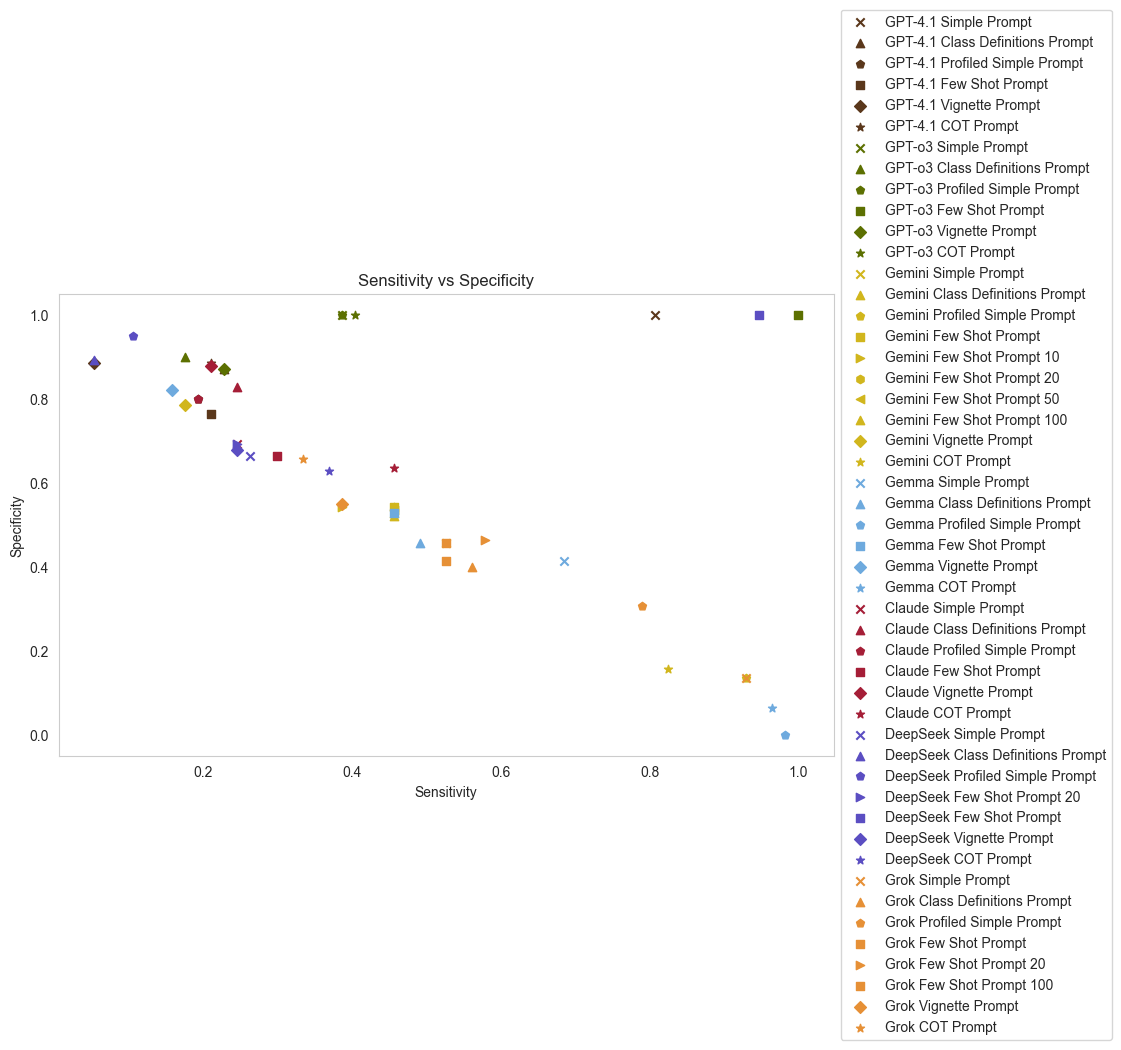

In [278]:
# plot sensitivity vs specificity for all simple prompts
plt.figure(figsize = (10, 6))

plt.scatter(metrics_GPT_4_simple_prompt["sensitivity"], metrics_GPT_4_simple_prompt["specificity"], label = "GPT-4.1 Simple Prompt", color = hex_colors[11], marker = "x")
plt.scatter(metrics_GPT_4_class_def_prompt["sensitivity"], metrics_GPT_4_class_def_prompt["specificity"], label = "GPT-4.1 Class Definitions Prompt", color = hex_colors[11], marker = "^")
plt.scatter(metrics_GPT_4_profiled_simple_prompt["sensitivity"], metrics_GPT_4_profiled_simple_prompt["specificity"], label = "GPT-4.1 Profiled Simple Prompt", color = hex_colors[11], marker = "p")
plt.scatter(metrics_GPT_4_few_shot_prompt["sensitivity"], metrics_GPT_4_few_shot_prompt["specificity"], label = "GPT-4.1 Few Shot Prompt", color = hex_colors[11], marker = "s")
plt.scatter(metrics_GPT_4_vignette_prompt["sensitivity"], metrics_GPT_4_vignette_prompt["specificity"], label = "GPT-4.1 Vignette Prompt", color = hex_colors[11], marker = "D")
plt.scatter(metrics_GPT_4_cot_prompt["sensitivity"], metrics_GPT_4_cot_prompt["specificity"], label = "GPT-4.1 COT Prompt", color = hex_colors[11], marker = "*")

plt.scatter(metrics_GPT_o3_simple_prompt["sensitivity"], metrics_GPT_o3_simple_prompt["specificity"], label = "GPT-o3 Simple Prompt", color = hex_colors[9], marker = "x")
plt.scatter(metrics_GPT_o3_class_def_prompt["sensitivity"], metrics_GPT_o3_class_def_prompt["specificity"], label = "GPT-o3 Class Definitions Prompt", color = hex_colors[9], marker = "^")
plt.scatter(metrics_GPT_o3_profiled_simple_prompt["sensitivity"], metrics_GPT_o3_profiled_simple_prompt["specificity"], label = "GPT-o3 Profiled Simple Prompt", color = hex_colors[9], marker = "p")
plt.scatter(metrics_GPT_o3_few_shot_prompt["sensitivity"], metrics_GPT_o3_few_shot_prompt["specificity"], label = "GPT-o3 Few Shot Prompt", color = hex_colors[9], marker = "s")
plt.scatter(metrics_GPT_o3_vignette_prompt["sensitivity"], metrics_GPT_o3_vignette_prompt["specificity"], label = "GPT-o3 Vignette Prompt", color = hex_colors[9], marker = "D")
plt.scatter(metrics_GPT_o3_cot_prompt["sensitivity"], metrics_GPT_o3_cot_prompt["specificity"], label = "GPT-o3 COT Prompt", color = hex_colors[9], marker = "*")

plt.scatter(metrics_Gemini_simple_prompt["sensitivity"], metrics_Gemini_simple_prompt["specificity"], label = "Gemini Simple Prompt", color = hex_colors[2], marker = "x")
plt.scatter(metrics_Gemini_class_def_prompt["sensitivity"], metrics_Gemini_class_def_prompt["specificity"], label = "Gemini Class Definitions Prompt", color = hex_colors[2], marker = "^")
plt.scatter(metrics_Gemini_profiled_simple_prompt["sensitivity"], metrics_Gemini_profiled_simple_prompt["specificity"], label = "Gemini Profiled Simple Prompt", color = hex_colors[2], marker = "p")
plt.scatter(metrics_Gemini_few_shot_prompt["sensitivity"], metrics_Gemini_few_shot_prompt["specificity"], label = "Gemini Few Shot Prompt", color = hex_colors[2], marker = "s")
plt.scatter(metrics_Gemini_few_shot_prompt_10["sensitivity"], metrics_Gemini_few_shot_prompt_10["specificity"], label = "Gemini Few Shot Prompt 10", color = hex_colors[2], marker = ">")
plt.scatter(metrics_Gemini_few_shot_prompt_20["sensitivity"], metrics_Gemini_few_shot_prompt_20["specificity"], label = "Gemini Few Shot Prompt 20", color = hex_colors[2], marker = "h")
plt.scatter(metrics_Gemini_few_shot_prompt_50["sensitivity"], metrics_Gemini_few_shot_prompt_50["specificity"], label = "Gemini Few Shot Prompt 50", color = hex_colors[2], marker = "<")
plt.scatter(metrics_Gemini_few_shot_prompt_100["sensitivity"], metrics_Gemini_few_shot_prompt_100["specificity"], label = "Gemini Few Shot Prompt 100", color = hex_colors[2], marker = "^")
plt.scatter(metrics_Gemini_vignette_prompt["sensitivity"], metrics_Gemini_vignette_prompt["specificity"], label = "Gemini Vignette Prompt", color = hex_colors[2], marker = "D")
plt.scatter(metrics_Gemini_cot_prompt["sensitivity"], metrics_Gemini_cot_prompt["specificity"], label = "Gemini COT Prompt", color = hex_colors[2], marker = "*")

plt.scatter(metrics_Gemma_simple_prompt["sensitivity"], metrics_Gemma_simple_prompt["specificity"], label = "Gemma Simple Prompt", color = hex_colors[5], marker = "x")
plt.scatter(metrics_Gemma_class_def_prompt["sensitivity"], metrics_Gemma_class_def_prompt["specificity"], label = "Gemma Class Definitions Prompt", color = hex_colors[5], marker = "^")
plt.scatter(metrics_Gemma_profiled_simple_prompt["sensitivity"], metrics_Gemma_profiled_simple_prompt["specificity"], label = "Gemma Profiled Simple Prompt", color = hex_colors[5], marker = "p")
plt.scatter(metrics_Gemma_few_shot_prompt["sensitivity"], metrics_Gemma_few_shot_prompt["specificity"], label = "Gemma Few Shot Prompt", color = hex_colors[5], marker = "s")
plt.scatter(metrics_Gemma_vignette_prompt["sensitivity"], metrics_Gemma_vignette_prompt["specificity"], label = "Gemma Vignette Prompt", color = hex_colors[5], marker = "D")
plt.scatter(metrics_Gemma_cot_prompt["sensitivity"], metrics_Gemma_cot_prompt["specificity"], label = "Gemma COT Prompt", color = hex_colors[5], marker = "*")

plt.scatter(metrics_Claude_4_simple_prompt["sensitivity"], metrics_Claude_4_simple_prompt["specificity"], label = "Claude Simple Prompt", color = hex_colors[0], marker = "x")
plt.scatter(metrics_Claude_4_class_def_prompt["sensitivity"], metrics_Claude_4_class_def_prompt["specificity"], label = "Claude Class Definitions Prompt", color = hex_colors[0], marker = "^")
plt.scatter(metrics_Claude_4_profiled_simple_prompt["sensitivity"], metrics_Claude_4_profiled_simple_prompt["specificity"], label = "Claude Profiled Simple Prompt", color = hex_colors[0], marker = "p")
plt.scatter(metrics_Claude_4_few_shot_prompt["sensitivity"], metrics_Claude_4_few_shot_prompt["specificity"], label = "Claude Few Shot Prompt", color = hex_colors[0], marker = "s")
plt.scatter(metrics_Claude_4_vignette_prompt["sensitivity"], metrics_Claude_4_vignette_prompt["specificity"], label = "Claude Vignette Prompt", color = hex_colors[0], marker = "D")
plt.scatter(metrics_Claude_4_cot_prompt["sensitivity"], metrics_Claude_4_cot_prompt["specificity"], label = "Claude COT Prompt", color = hex_colors[0], marker = "*")

plt.scatter(metrics_DeepSeek_simple_prompt["sensitivity"], metrics_DeepSeek_simple_prompt["specificity"], label = "DeepSeek Simple Prompt", color = hex_colors[13], marker = "x")
plt.scatter(metrics_DeepSeek_class_def_prompt["sensitivity"], metrics_DeepSeek_class_def_prompt["specificity"], label = "DeepSeek Class Definitions Prompt", color = hex_colors[13], marker = "^")
plt.scatter(metrics_DeepSeek_profiled_simple_prompt["sensitivity"], metrics_DeepSeek_profiled_simple_prompt["specificity"], label = "DeepSeek Profiled Simple Prompt", color = hex_colors[13], marker = "p")
plt.scatter(metrics_DeepSeek_few_shot_prompt_20["sensitivity"], metrics_DeepSeek_few_shot_prompt_20["specificity"], label = "DeepSeek Few Shot Prompt 20", color = hex_colors[13], marker = ">")
plt.scatter(metrics_DeepSeek_few_shot_prompt["sensitivity"], metrics_DeepSeek_few_shot_prompt["specificity"], label = "DeepSeek Few Shot Prompt", color = hex_colors[13], marker = "s")
plt.scatter(metrics_DeepSeek_vignette_prompt["sensitivity"], metrics_DeepSeek_vignette_prompt["specificity"], label = "DeepSeek Vignette Prompt", color = hex_colors[13], marker = "D")
plt.scatter(metrics_DeepSeek_cot_prompt["sensitivity"], metrics_DeepSeek_cot_prompt["specificity"], label = "DeepSeek COT Prompt", color = hex_colors[13], marker = "*")

plt.scatter(metrics_Grok_simple_prompt["sensitivity"], metrics_Grok_simple_prompt["specificity"], label = "Grok Simple Prompt", color = hex_colors[4], marker = "x")
plt.scatter(metrics_Grok_class_def_prompt["sensitivity"], metrics_Grok_class_def_prompt["specificity"], label = "Grok Class Definitions Prompt", color = hex_colors[4], marker = "^")
plt.scatter(metrics_Grok_profiled_simple_prompt["sensitivity"], metrics_Grok_profiled_simple_prompt["specificity"], label = "Grok Profiled Simple Prompt", color = hex_colors[4], marker = "p")
plt.scatter(metrics_Grok_few_shot_prompt["sensitivity"], metrics_Grok_few_shot_prompt["specificity"], label = "Grok Few Shot Prompt", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_few_shot_prompt_20["sensitivity"], metrics_Grok_few_shot_prompt_20["specificity"], label = "Grok Few Shot Prompt 20", color = hex_colors[4], marker = ">")
plt.scatter(metrics_Grok_few_shot_prompt_100["sensitivity"], metrics_Grok_few_shot_prompt_100["specificity"], label = "Grok Few Shot Prompt 100", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_vignette_prompt["sensitivity"], metrics_Grok_vignette_prompt["specificity"], label = "Grok Vignette Prompt", color = hex_colors[4], marker = "D")
plt.scatter(metrics_Grok_cot_prompt["sensitivity"], metrics_Grok_cot_prompt["specificity"], label = "Grok COT Prompt", color = hex_colors[4], marker = "*")

# plt.xlim(-0.02, 1.02)
# plt.ylim(-0.02, 1.02)

plt.xlabel("Sensitivity")
plt.ylabel("Specificity")
plt.title("Sensitivity vs Specificity")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
# plt.savefig("../doc/figs/01_LLM_ML_performance/sensitivity_specificity_LLMs.png", dpi = 300, bbox_inches = "tight")

## Metrics again with whole data_change dataset without exclusion

In [298]:
X = data_change
X = X.drop(["hpi"], axis=1)

# Target
y = data_change["hpi"]

# Train-test split
_, _, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("y_train shape: ", y_train.shape, round(y_train.shape[0] / len(y), 2), "\n",
      "y_test shape: ", y_test.shape, round(y_test.shape[0] / len(y), 2), "\n")

y_train shape:  (983,) 0.8 
 y_test shape:  (246,) 0.2 



In [299]:
metrics_GPT_4_simple_prompt = calculate_metrics(y_test, data_GPT_4_simple_prompt)
metrics_GPT_4_class_def_prompt = calculate_metrics(y_test, data_GPT_4_class_def_prompt)
metrics_GPT_4_profiled_simple_prompt = calculate_metrics(y_test, data_GPT_4_profiled_simple_prompt)
metrics_GPT_4_few_shot_prompt = calculate_metrics(y_test, data_GPT_4_few_shot_prompt)
metrics_GPT_4_vignette_prompt = calculate_metrics(y_test, data_GPT_4_vignette_prompt)
metrics_GPT_4_cot_prompt = calculate_metrics(y_test, data_GPT_4_cot_prompt)

In [300]:
metrics_GPT_o3_simple_prompt = calculate_metrics(y_test, data_GPT_o3_simple_prompt)
metrics_GPT_o3_class_def_prompt = calculate_metrics(y_test, data_GPT_o3_class_def_prompt)
metrics_GPT_o3_profiled_simple_prompt = calculate_metrics(y_test, data_GPT_o3_profiled_simple_prompt)
metrics_GPT_o3_few_shot_prompt = calculate_metrics(y_test, data_GPT_o3_few_shot_prompt)
metrics_GPT_o3_vignette_prompt = calculate_metrics(y_test, data_GPT_o3_vignette_prompt)
metrics_GPT_o3_cot_prompt = calculate_metrics(y_test, data_GPT_o3_cot_prompt)

In [301]:
metrics_Gemini_simple_prompt = calculate_metrics(y_test, data_Gemini_simple_prompt)
metrics_Gemini_class_def_prompt = calculate_metrics(y_test, data_Gemini_class_def_prompt)
metrics_Gemini_profiled_simple_prompt = calculate_metrics(y_test, data_Gemini_profiled_simple_prompt)
metrics_Gemini_few_shot_prompt = calculate_metrics(y_test, data_Gemini_few_shot_prompt)
metrics_Gemini_few_shot_prompt_10 = calculate_metrics(y_test, data_Gemini_few_shot_prompt_10)
metrics_Gemini_few_shot_prompt_20 = calculate_metrics(y_test, data_Gemini_few_shot_prompt_20)
metrics_Gemini_few_shot_prompt_50 = calculate_metrics(y_test, data_Gemini_few_shot_prompt_50)
metrics_Gemini_few_shot_prompt_100 = calculate_metrics(y_test, data_Gemini_few_shot_prompt_100)
metrics_Gemini_vignette_prompt = calculate_metrics(y_test, data_Gemini_vignette_prompt)
metrics_Gemini_cot_prompt = calculate_metrics(y_test, data_Gemini_cot_prompt)

In [302]:
metrics_Gemma_simple_prompt = calculate_metrics(y_test, data_Gemma_simple_prompt)
metrics_Gemma_class_def_prompt = calculate_metrics(y_test, data_Gemma_class_def_prompt)
metrics_Gemma_profiled_simple_prompt = calculate_metrics(y_test, data_Gemma_profiled_simple_prompt)
metrics_Gemma_few_shot_prompt = calculate_metrics(y_test, data_Gemma_few_shot_prompt)
metrics_Gemma_vignette_prompt = calculate_metrics(y_test, data_Gemma_vignette_prompt)
metrics_Gemma_cot_prompt = calculate_metrics(y_test, data_Gemma_cot_prompt)

In [303]:
metrics_Claude_4_simple_prompt = calculate_metrics(y_test, data_Claude_4_simple_prompt)
metrics_Claude_4_class_def_prompt = calculate_metrics(y_test, data_Claude_4_class_def_prompt)
metrics_Claude_4_profiled_simple_prompt = calculate_metrics(y_test, data_Claude_4_profiled_simple_prompt)
metrics_Claude_4_few_shot_prompt = calculate_metrics(y_test, data_Claude_4_few_shot_prompt)
metrics_Claude_4_vignette_prompt = calculate_metrics(y_test, data_Claude_4_vignette_prompt)
metrics_Claude_4_cot_prompt = calculate_metrics(y_test, data_Claude_4_cot_prompt)

In [310]:
metrics_DeepSeek_simple_prompt = calculate_metrics(y_test, data_DeepSeek_simple_prompt)
metrics_DeepSeek_class_def_prompt = calculate_metrics(y_test, data_DeepSeek_class_def_prompt)
metrics_DeepSeek_profiled_simple_prompt = calculate_metrics(y_test, data_DeepSeek_profiled_simple_prompt)
# metrics_DeepSeek_few_shot_prompt = calculate_metrics(y_test, data_DeepSeek_few_shot_prompt)
# metrics_DeepSeek_few_shot_prompt_20 = calculate_metrics(y_test, data_DeepSeek_few_shot_prompt_20)
metrics_DeepSeek_vignette_prompt = calculate_metrics(y_test, data_DeepSeek_vignette_prompt)
metrics_DeepSeek_cot_prompt = calculate_metrics(y_test, data_DeepSeek_cot_prompt)

In [312]:
data_DeepSeek_class_def_prompt

,y_pred,original_index
0,0,0
1,0,1
2,1,2
3,0,3
4,1,4
...,...,...
1224,0,1224
1225,0,1225
1226,0,1226
1227,0,1227


In [308]:
metrics_Grok_simple_prompt = calculate_metrics(y_test, data_Grok_simple_prompt)
metrics_Grok_class_def_prompt = calculate_metrics(y_test, data_Grok_class_def_prompt)
metrics_Grok_profiled_simple_prompt = calculate_metrics(y_test, data_Grok_profiled_simple_prompt)
metrics_Grok_few_shot_prompt = calculate_metrics(y_test, data_Grok_few_shot_prompt)
metrics_Grok_few_shot_prompt_20 = calculate_metrics(y_test, data_Grok_few_shot_prompt_20)
metrics_Grok_few_shot_prompt_100 = calculate_metrics(y_test, data_Grok_few_shot_prompt_100)
metrics_Grok_vignette_prompt = calculate_metrics(y_test, data_Grok_vignette_prompt)
metrics_Grok_cot_prompt = calculate_metrics(y_test, data_Grok_cot_prompt)

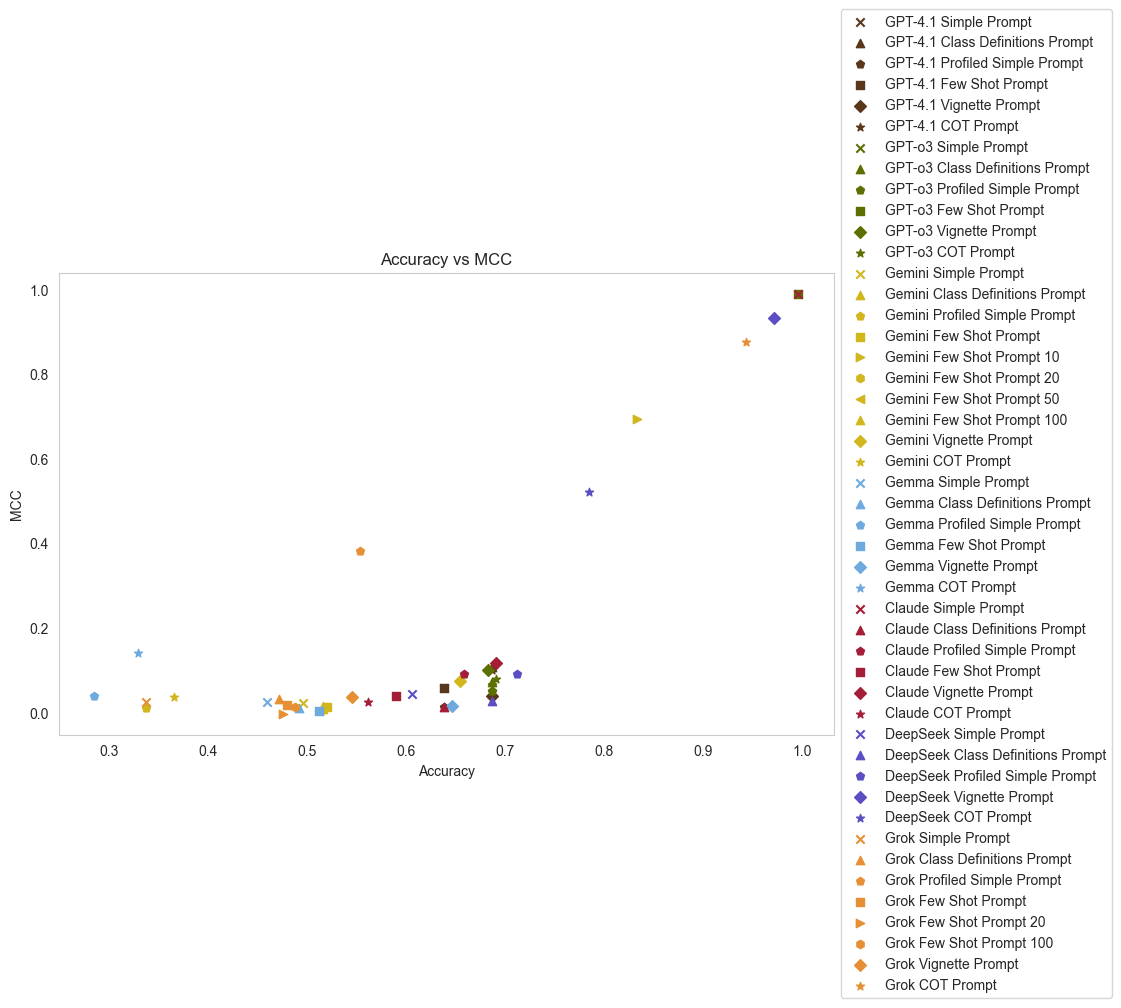

In [313]:
# plot all simple prompts for LLMs: MCC vs Accuracy
plt.figure(figsize = (10, 6))

plt.scatter(metrics_GPT_4_simple_prompt["accuracy"], metrics_GPT_4_simple_prompt["mcc"], label = "GPT-4.1 Simple Prompt", color = hex_colors[11], marker = "x")
plt.scatter(metrics_GPT_4_class_def_prompt["accuracy"], metrics_GPT_4_class_def_prompt["mcc"], label = "GPT-4.1 Class Definitions Prompt", color = hex_colors[11], marker = "^")
plt.scatter(metrics_GPT_4_profiled_simple_prompt["accuracy"], metrics_GPT_4_profiled_simple_prompt["mcc"], label = "GPT-4.1 Profiled Simple Prompt", color = hex_colors[11], marker = "p")
plt.scatter(metrics_GPT_4_few_shot_prompt["accuracy"], metrics_GPT_4_few_shot_prompt["mcc"], label = "GPT-4.1 Few Shot Prompt", color = hex_colors[11], marker = "s")
plt.scatter(metrics_GPT_4_vignette_prompt["accuracy"], metrics_GPT_4_vignette_prompt["mcc"], label = "GPT-4.1 Vignette Prompt", color = hex_colors[11], marker = "D")
plt.scatter(metrics_GPT_4_cot_prompt["accuracy"], metrics_GPT_4_cot_prompt["mcc"], label = "GPT-4.1 COT Prompt", color = hex_colors[11], marker = "*")

plt.scatter(metrics_GPT_o3_simple_prompt["accuracy"], metrics_GPT_o3_simple_prompt["mcc"], label = "GPT-o3 Simple Prompt", color = hex_colors[9], marker = "x")
plt.scatter(metrics_GPT_o3_class_def_prompt["accuracy"], metrics_GPT_o3_class_def_prompt["mcc"], label = "GPT-o3 Class Definitions Prompt", color = hex_colors[9], marker = "^")
plt.scatter(metrics_GPT_o3_profiled_simple_prompt["accuracy"], metrics_GPT_o3_profiled_simple_prompt["mcc"], label = "GPT-o3 Profiled Simple Prompt", color = hex_colors[9], marker = "p")
plt.scatter(metrics_GPT_o3_few_shot_prompt["accuracy"], metrics_GPT_o3_few_shot_prompt["mcc"], label = "GPT-o3 Few Shot Prompt", color = hex_colors[9], marker = "s")
plt.scatter(metrics_GPT_o3_vignette_prompt["accuracy"], metrics_GPT_o3_vignette_prompt["mcc"], label = "GPT-o3 Vignette Prompt", color = hex_colors[9], marker = "D")
plt.scatter(metrics_GPT_o3_cot_prompt["accuracy"], metrics_GPT_o3_cot_prompt["mcc"], label = "GPT-o3 COT Prompt", color = hex_colors[9], marker = "*")

plt.scatter(metrics_Gemini_simple_prompt["accuracy"], metrics_Gemini_simple_prompt["mcc"], label = "Gemini Simple Prompt", color = hex_colors[2], marker = "x")
plt.scatter(metrics_Gemini_class_def_prompt["accuracy"], metrics_Gemini_class_def_prompt["mcc"], label = "Gemini Class Definitions Prompt", color = hex_colors[2], marker = "^")
plt.scatter(metrics_Gemini_profiled_simple_prompt["accuracy"], metrics_Gemini_profiled_simple_prompt["mcc"], label = "Gemini Profiled Simple Prompt", color = hex_colors[2], marker = "p")
plt.scatter(metrics_Gemini_few_shot_prompt["accuracy"], metrics_Gemini_few_shot_prompt["mcc"], label = "Gemini Few Shot Prompt", color = hex_colors[2], marker = "s")
plt.scatter(metrics_Gemini_few_shot_prompt_10["accuracy"], metrics_Gemini_few_shot_prompt_10["mcc"], label = "Gemini Few Shot Prompt 10", color = hex_colors[2], marker = ">")
plt.scatter(metrics_Gemini_few_shot_prompt_20["accuracy"], metrics_Gemini_few_shot_prompt_20["mcc"], label = "Gemini Few Shot Prompt 20", color = hex_colors[2], marker = "h")
plt.scatter(metrics_Gemini_few_shot_prompt_50["accuracy"], metrics_Gemini_few_shot_prompt_50["mcc"], label = "Gemini Few Shot Prompt 50", color = hex_colors[2], marker = "<")
plt.scatter(metrics_Gemini_few_shot_prompt_100["accuracy"], metrics_Gemini_few_shot_prompt_100["mcc"], label = "Gemini Few Shot Prompt 100", color = hex_colors[2], marker = "^")
plt.scatter(metrics_Gemini_vignette_prompt["accuracy"], metrics_Gemini_vignette_prompt["mcc"], label = "Gemini Vignette Prompt", color = hex_colors[2], marker = "D")
plt.scatter(metrics_Gemini_cot_prompt["accuracy"], metrics_Gemini_cot_prompt["mcc"], label = "Gemini COT Prompt", color = hex_colors[2], marker = "*")

plt.scatter(metrics_Gemma_simple_prompt["accuracy"], metrics_Gemma_simple_prompt["mcc"], label = "Gemma Simple Prompt", color = hex_colors[5], marker = "x")
plt.scatter(metrics_Gemma_class_def_prompt["accuracy"], metrics_Gemma_class_def_prompt["mcc"], label = "Gemma Class Definitions Prompt", color = hex_colors[5], marker = "^")
plt.scatter(metrics_Gemma_profiled_simple_prompt["accuracy"], metrics_Gemma_profiled_simple_prompt["mcc"], label = "Gemma Profiled Simple Prompt", color = hex_colors[5], marker = "p")
plt.scatter(metrics_Gemma_few_shot_prompt["accuracy"], metrics_Gemma_few_shot_prompt["mcc"], label = "Gemma Few Shot Prompt", color = hex_colors[5], marker = "s")
plt.scatter(metrics_Gemma_vignette_prompt["accuracy"], metrics_Gemma_vignette_prompt["mcc"], label = "Gemma Vignette Prompt", color = hex_colors[5], marker = "D")
plt.scatter(metrics_Gemma_cot_prompt["accuracy"], metrics_Gemma_cot_prompt["mcc"], label = "Gemma COT Prompt", color = hex_colors[5], marker = "*")

plt.scatter(metrics_Claude_4_simple_prompt["accuracy"], metrics_Claude_4_simple_prompt["mcc"], label = "Claude Simple Prompt", color = hex_colors[0], marker = "x")
plt.scatter(metrics_Claude_4_class_def_prompt["accuracy"], metrics_Claude_4_class_def_prompt["mcc"], label = "Claude Class Definitions Prompt", color = hex_colors[0], marker = "^")
plt.scatter(metrics_Claude_4_profiled_simple_prompt["accuracy"], metrics_Claude_4_profiled_simple_prompt["mcc"], label = "Claude Profiled Simple Prompt", color = hex_colors[0], marker = "p")
plt.scatter(metrics_Claude_4_few_shot_prompt["accuracy"], metrics_Claude_4_few_shot_prompt["mcc"], label = "Claude Few Shot Prompt", color = hex_colors[0], marker = "s")
plt.scatter(metrics_Claude_4_vignette_prompt["accuracy"], metrics_Claude_4_vignette_prompt["mcc"], label = "Claude Vignette Prompt", color = hex_colors[0], marker = "D")
plt.scatter(metrics_Claude_4_cot_prompt["accuracy"], metrics_Claude_4_cot_prompt["mcc"], label = "Claude COT Prompt", color = hex_colors[0], marker = "*")

plt.scatter(metrics_DeepSeek_simple_prompt["accuracy"], metrics_DeepSeek_simple_prompt["mcc"], label = "DeepSeek Simple Prompt", color = hex_colors[13], marker = "x")
plt.scatter(metrics_DeepSeek_class_def_prompt["accuracy"], metrics_DeepSeek_class_def_prompt["mcc"], label = "DeepSeek Class Definitions Prompt", color = hex_colors[13], marker = "^")
plt.scatter(metrics_DeepSeek_profiled_simple_prompt["accuracy"], metrics_DeepSeek_profiled_simple_prompt["mcc"], label = "DeepSeek Profiled Simple Prompt", color = hex_colors[13], marker = "p")
# plt.scatter(metrics_DeepSeek_few_shot_prompt_20["accuracy"], metrics_DeepSeek_few_shot_prompt_20["mcc"], label = "DeepSeek Few Shot Prompt", color = hex_colors[13], marker = ">")
# plt.scatter(metrics_DeepSeek_few_shot_prompt["accuracy"], metrics_DeepSeek_few_shot_prompt["mcc"], label = "DeepSeek Few Shot Prompt", color = hex_colors[13], marker = "s")
plt.scatter(metrics_DeepSeek_vignette_prompt["accuracy"], metrics_DeepSeek_vignette_prompt["mcc"], label = "DeepSeek Vignette Prompt", color = hex_colors[13], marker = "D")
plt.scatter(metrics_DeepSeek_cot_prompt["accuracy"], metrics_DeepSeek_cot_prompt["mcc"], label = "DeepSeek COT Prompt", color = hex_colors[13], marker = "*")

plt.scatter(metrics_Grok_simple_prompt["accuracy"], metrics_Grok_simple_prompt["mcc"], label = "Grok Simple Prompt", color = hex_colors[4], marker = "x")
plt.scatter(metrics_Grok_class_def_prompt["accuracy"], metrics_Grok_class_def_prompt["mcc"], label = "Grok Class Definitions Prompt", color = hex_colors[4], marker = "^")
plt.scatter(metrics_Grok_profiled_simple_prompt["accuracy"], metrics_Grok_profiled_simple_prompt["mcc"], label = "Grok Profiled Simple Prompt", color = hex_colors[4], marker = "p")
plt.scatter(metrics_Grok_few_shot_prompt["accuracy"], metrics_Grok_few_shot_prompt["mcc"], label = "Grok Few Shot Prompt", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_few_shot_prompt_20["accuracy"], metrics_Grok_few_shot_prompt_20["mcc"], label = "Grok Few Shot Prompt 20", color = hex_colors[4], marker = ">")
plt.scatter(metrics_Grok_few_shot_prompt_100["accuracy"], metrics_Grok_few_shot_prompt_100["mcc"], label = "Grok Few Shot Prompt 100", color = hex_colors[4], marker = "h")
plt.scatter(metrics_Grok_vignette_prompt["accuracy"], metrics_Grok_vignette_prompt["mcc"], label = "Grok Vignette Prompt", color = hex_colors[4], marker = "D")
plt.scatter(metrics_Grok_cot_prompt["accuracy"], metrics_Grok_cot_prompt["mcc"], label = "Grok COT Prompt", color = hex_colors[4], marker = "*")


# plt.xlim(0.3, 0.7)
# plt.ylim(-0.05, 0.25)

# plt.xlim(0, 1.02)
# plt.ylim(-1.02, 1.02)

plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_LLMs.png", dpi = 300, bbox_inches = "tight")
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_all_models.png", dpi = 300, bbox_inches = "tight")
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_LLMs_ML_0_1.png", dpi = 300, bbox_inches = "tight")

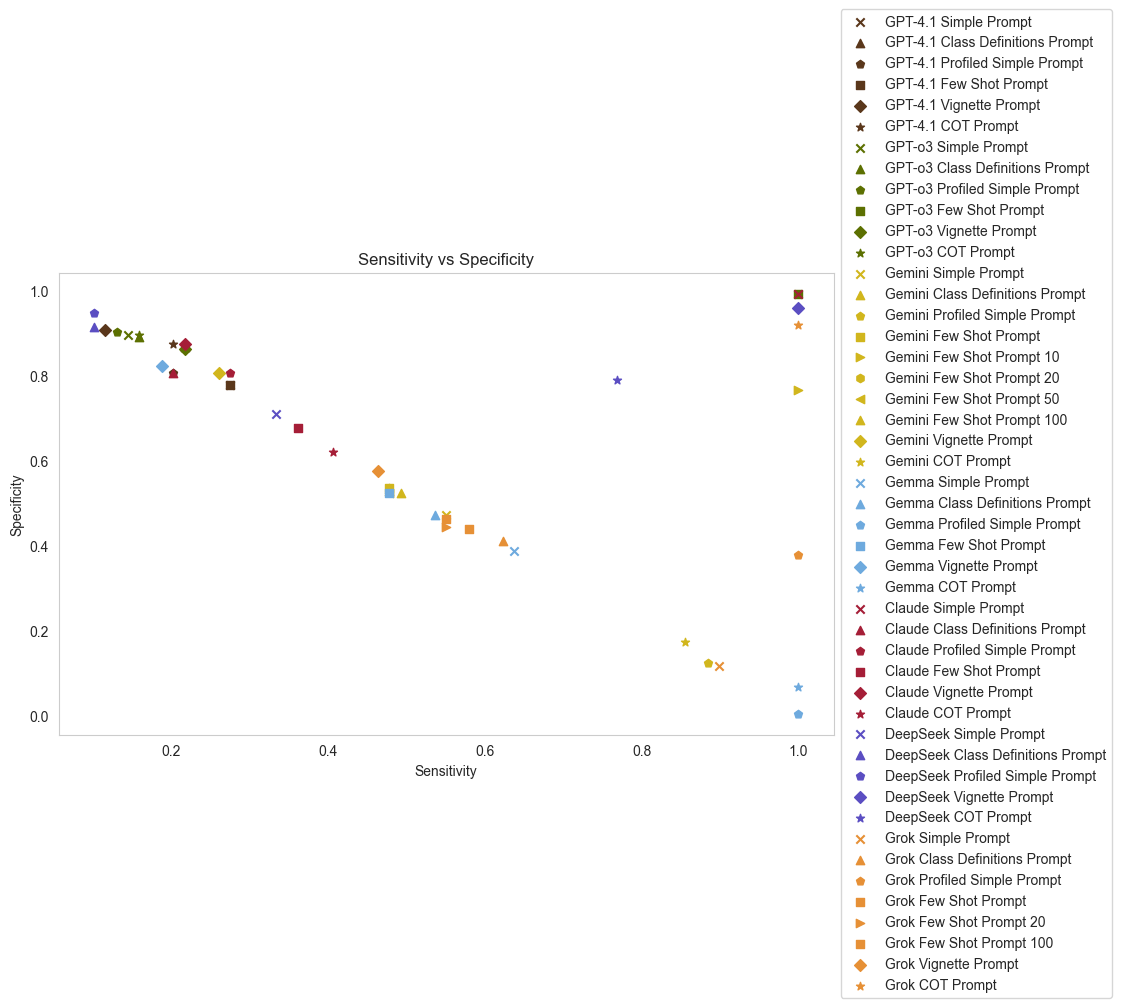

In [314]:
# plot sensitivity vs specificity for all simple prompts
plt.figure(figsize = (10, 6))

plt.scatter(metrics_GPT_4_simple_prompt["sensitivity"], metrics_GPT_4_simple_prompt["specificity"], label = "GPT-4.1 Simple Prompt", color = hex_colors[11], marker = "x")
plt.scatter(metrics_GPT_4_class_def_prompt["sensitivity"], metrics_GPT_4_class_def_prompt["specificity"], label = "GPT-4.1 Class Definitions Prompt", color = hex_colors[11], marker = "^")
plt.scatter(metrics_GPT_4_profiled_simple_prompt["sensitivity"], metrics_GPT_4_profiled_simple_prompt["specificity"], label = "GPT-4.1 Profiled Simple Prompt", color = hex_colors[11], marker = "p")
plt.scatter(metrics_GPT_4_few_shot_prompt["sensitivity"], metrics_GPT_4_few_shot_prompt["specificity"], label = "GPT-4.1 Few Shot Prompt", color = hex_colors[11], marker = "s")
plt.scatter(metrics_GPT_4_vignette_prompt["sensitivity"], metrics_GPT_4_vignette_prompt["specificity"], label = "GPT-4.1 Vignette Prompt", color = hex_colors[11], marker = "D")
plt.scatter(metrics_GPT_4_cot_prompt["sensitivity"], metrics_GPT_4_cot_prompt["specificity"], label = "GPT-4.1 COT Prompt", color = hex_colors[11], marker = "*")

plt.scatter(metrics_GPT_o3_simple_prompt["sensitivity"], metrics_GPT_o3_simple_prompt["specificity"], label = "GPT-o3 Simple Prompt", color = hex_colors[9], marker = "x")
plt.scatter(metrics_GPT_o3_class_def_prompt["sensitivity"], metrics_GPT_o3_class_def_prompt["specificity"], label = "GPT-o3 Class Definitions Prompt", color = hex_colors[9], marker = "^")
plt.scatter(metrics_GPT_o3_profiled_simple_prompt["sensitivity"], metrics_GPT_o3_profiled_simple_prompt["specificity"], label = "GPT-o3 Profiled Simple Prompt", color = hex_colors[9], marker = "p")
plt.scatter(metrics_GPT_o3_few_shot_prompt["sensitivity"], metrics_GPT_o3_few_shot_prompt["specificity"], label = "GPT-o3 Few Shot Prompt", color = hex_colors[9], marker = "s")
plt.scatter(metrics_GPT_o3_vignette_prompt["sensitivity"], metrics_GPT_o3_vignette_prompt["specificity"], label = "GPT-o3 Vignette Prompt", color = hex_colors[9], marker = "D")
plt.scatter(metrics_GPT_o3_cot_prompt["sensitivity"], metrics_GPT_o3_cot_prompt["specificity"], label = "GPT-o3 COT Prompt", color = hex_colors[9], marker = "*")

plt.scatter(metrics_Gemini_simple_prompt["sensitivity"], metrics_Gemini_simple_prompt["specificity"], label = "Gemini Simple Prompt", color = hex_colors[2], marker = "x")
plt.scatter(metrics_Gemini_class_def_prompt["sensitivity"], metrics_Gemini_class_def_prompt["specificity"], label = "Gemini Class Definitions Prompt", color = hex_colors[2], marker = "^")
plt.scatter(metrics_Gemini_profiled_simple_prompt["sensitivity"], metrics_Gemini_profiled_simple_prompt["specificity"], label = "Gemini Profiled Simple Prompt", color = hex_colors[2], marker = "p")
plt.scatter(metrics_Gemini_few_shot_prompt["sensitivity"], metrics_Gemini_few_shot_prompt["specificity"], label = "Gemini Few Shot Prompt", color = hex_colors[2], marker = "s")
plt.scatter(metrics_Gemini_few_shot_prompt_10["sensitivity"], metrics_Gemini_few_shot_prompt_10["specificity"], label = "Gemini Few Shot Prompt 10", color = hex_colors[2], marker = ">")
plt.scatter(metrics_Gemini_few_shot_prompt_20["sensitivity"], metrics_Gemini_few_shot_prompt_20["specificity"], label = "Gemini Few Shot Prompt 20", color = hex_colors[2], marker = "h")
plt.scatter(metrics_Gemini_few_shot_prompt_50["sensitivity"], metrics_Gemini_few_shot_prompt_50["specificity"], label = "Gemini Few Shot Prompt 50", color = hex_colors[2], marker = "<")
plt.scatter(metrics_Gemini_few_shot_prompt_100["sensitivity"], metrics_Gemini_few_shot_prompt_100["specificity"], label = "Gemini Few Shot Prompt 100", color = hex_colors[2], marker = "^")
plt.scatter(metrics_Gemini_vignette_prompt["sensitivity"], metrics_Gemini_vignette_prompt["specificity"], label = "Gemini Vignette Prompt", color = hex_colors[2], marker = "D")
plt.scatter(metrics_Gemini_cot_prompt["sensitivity"], metrics_Gemini_cot_prompt["specificity"], label = "Gemini COT Prompt", color = hex_colors[2], marker = "*")

plt.scatter(metrics_Gemma_simple_prompt["sensitivity"], metrics_Gemma_simple_prompt["specificity"], label = "Gemma Simple Prompt", color = hex_colors[5], marker = "x")
plt.scatter(metrics_Gemma_class_def_prompt["sensitivity"], metrics_Gemma_class_def_prompt["specificity"], label = "Gemma Class Definitions Prompt", color = hex_colors[5], marker = "^")
plt.scatter(metrics_Gemma_profiled_simple_prompt["sensitivity"], metrics_Gemma_profiled_simple_prompt["specificity"], label = "Gemma Profiled Simple Prompt", color = hex_colors[5], marker = "p")
plt.scatter(metrics_Gemma_few_shot_prompt["sensitivity"], metrics_Gemma_few_shot_prompt["specificity"], label = "Gemma Few Shot Prompt", color = hex_colors[5], marker = "s")
plt.scatter(metrics_Gemma_vignette_prompt["sensitivity"], metrics_Gemma_vignette_prompt["specificity"], label = "Gemma Vignette Prompt", color = hex_colors[5], marker = "D")
plt.scatter(metrics_Gemma_cot_prompt["sensitivity"], metrics_Gemma_cot_prompt["specificity"], label = "Gemma COT Prompt", color = hex_colors[5], marker = "*")

plt.scatter(metrics_Claude_4_simple_prompt["sensitivity"], metrics_Claude_4_simple_prompt["specificity"], label = "Claude Simple Prompt", color = hex_colors[0], marker = "x")
plt.scatter(metrics_Claude_4_class_def_prompt["sensitivity"], metrics_Claude_4_class_def_prompt["specificity"], label = "Claude Class Definitions Prompt", color = hex_colors[0], marker = "^")
plt.scatter(metrics_Claude_4_profiled_simple_prompt["sensitivity"], metrics_Claude_4_profiled_simple_prompt["specificity"], label = "Claude Profiled Simple Prompt", color = hex_colors[0], marker = "p")
plt.scatter(metrics_Claude_4_few_shot_prompt["sensitivity"], metrics_Claude_4_few_shot_prompt["specificity"], label = "Claude Few Shot Prompt", color = hex_colors[0], marker = "s")
plt.scatter(metrics_Claude_4_vignette_prompt["sensitivity"], metrics_Claude_4_vignette_prompt["specificity"], label = "Claude Vignette Prompt", color = hex_colors[0], marker = "D")
plt.scatter(metrics_Claude_4_cot_prompt["sensitivity"], metrics_Claude_4_cot_prompt["specificity"], label = "Claude COT Prompt", color = hex_colors[0], marker = "*")

plt.scatter(metrics_DeepSeek_simple_prompt["sensitivity"], metrics_DeepSeek_simple_prompt["specificity"], label = "DeepSeek Simple Prompt", color = hex_colors[13], marker = "x")
plt.scatter(metrics_DeepSeek_class_def_prompt["sensitivity"], metrics_DeepSeek_class_def_prompt["specificity"], label = "DeepSeek Class Definitions Prompt", color = hex_colors[13], marker = "^")
plt.scatter(metrics_DeepSeek_profiled_simple_prompt["sensitivity"], metrics_DeepSeek_profiled_simple_prompt["specificity"], label = "DeepSeek Profiled Simple Prompt", color = hex_colors[13], marker = "p")
# plt.scatter(metrics_DeepSeek_few_shot_prompt_20["sensitivity"], metrics_DeepSeek_few_shot_prompt_20["specificity"], label = "DeepSeek Few Shot Prompt 20", color = hex_colors[13], marker = ">")
# plt.scatter(metrics_DeepSeek_few_shot_prompt["sensitivity"], metrics_DeepSeek_few_shot_prompt["specificity"], label = "DeepSeek Few Shot Prompt", color = hex_colors[13], marker = "s")
plt.scatter(metrics_DeepSeek_vignette_prompt["sensitivity"], metrics_DeepSeek_vignette_prompt["specificity"], label = "DeepSeek Vignette Prompt", color = hex_colors[13], marker = "D")
plt.scatter(metrics_DeepSeek_cot_prompt["sensitivity"], metrics_DeepSeek_cot_prompt["specificity"], label = "DeepSeek COT Prompt", color = hex_colors[13], marker = "*")

plt.scatter(metrics_Grok_simple_prompt["sensitivity"], metrics_Grok_simple_prompt["specificity"], label = "Grok Simple Prompt", color = hex_colors[4], marker = "x")
plt.scatter(metrics_Grok_class_def_prompt["sensitivity"], metrics_Grok_class_def_prompt["specificity"], label = "Grok Class Definitions Prompt", color = hex_colors[4], marker = "^")
plt.scatter(metrics_Grok_profiled_simple_prompt["sensitivity"], metrics_Grok_profiled_simple_prompt["specificity"], label = "Grok Profiled Simple Prompt", color = hex_colors[4], marker = "p")
plt.scatter(metrics_Grok_few_shot_prompt["sensitivity"], metrics_Grok_few_shot_prompt["specificity"], label = "Grok Few Shot Prompt", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_few_shot_prompt_20["sensitivity"], metrics_Grok_few_shot_prompt_20["specificity"], label = "Grok Few Shot Prompt 20", color = hex_colors[4], marker = ">")
plt.scatter(metrics_Grok_few_shot_prompt_100["sensitivity"], metrics_Grok_few_shot_prompt_100["specificity"], label = "Grok Few Shot Prompt 100", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_vignette_prompt["sensitivity"], metrics_Grok_vignette_prompt["specificity"], label = "Grok Vignette Prompt", color = hex_colors[4], marker = "D")
plt.scatter(metrics_Grok_cot_prompt["sensitivity"], metrics_Grok_cot_prompt["specificity"], label = "Grok COT Prompt", color = hex_colors[4], marker = "*")

# plt.xlim(-0.02, 1.02)
# plt.ylim(-0.02, 1.02)

plt.xlabel("Sensitivity")
plt.ylabel("Specificity")
plt.title("Sensitivity vs Specificity")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
# plt.savefig("../doc/figs/01_LLM_ML_performance/sensitivity_specificity_LLMs.png", dpi = 300, bbox_inches = "tight")